# Coursework 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%config InlineBackend.figure_format = "retina"

## The Perceptron

An artificial neuron known as the *perceptron* is defined as the activation function

$$
    \phi(x,w,b):= H({\bf w}^T {\bf x} + b) = \begin{cases}
        1 & {\bf w}^T {\bf x} \geq -b \\
        0 & {\bf w}^T{\bf x} < -b
    \end{cases}
$$

In [54]:
X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 0]
])
Phi = np.c_[np.ones(6), X]

## Version I
### Dataset of {-1, 1} values

In [53]:
y = np.array([1, 1, -1, -1, -1, -1])

We notice that the datapoints are linearly separable. Hence, there will exist a solution to the perceptron iteration

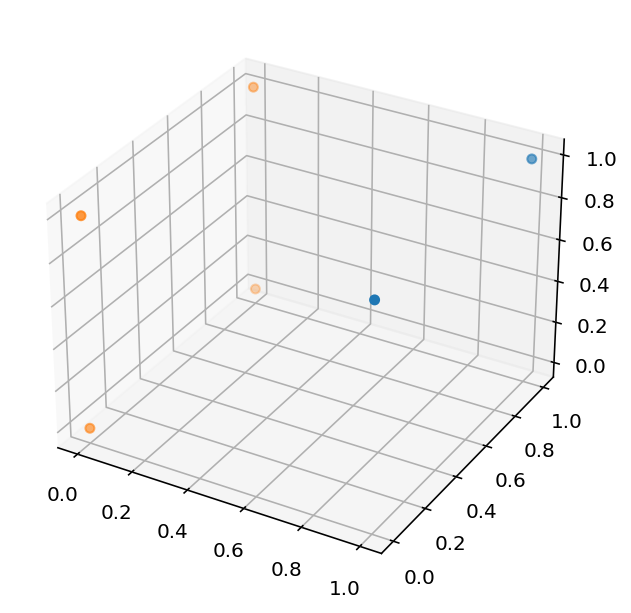

In [41]:
colors = ["tab:blue" if yn == 1 else "tab:orange" for yn in y]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*X.T, c=colors);

In [42]:
w = np.zeros(3)
eta = 1
for _ in range(100):
    w = w + eta * (X * y[:, None]).sum(axis=0)
w

array([ 200., -100.,    0.])

In [50]:
def H(a): return 1 * (a >= 0) - 1 * (a < 0)
w = np.ones(4)

nits = 10
for n in range(nits):
    # perceptron criterion
    # 1. choose indices with incorrect label
    ix, *_ = np.where(Phi @ w * y <= 0)
    if len(ix) == 0:
        print(f"Early termination ({n}/{nits})")
        break
    # 2. Update weights considering the previous indices
    w = w + (Phi[ix, :] * y[ix, None]).sum(axis=0)
w

Early termination (6/10)


array([-2.,  6.,  0.,  0.])

In [51]:
y

array([ 1,  1, -1, -1, -1, -1])

In [52]:
H(Phi @ w)

array([ 1,  1, -1, -1, -1, -1])

## Version II
### Dataset of {0, 1} values

In [192]:
X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 0]
])
N, M = X.shape
Phi = np.c_[np.ones(N), X]

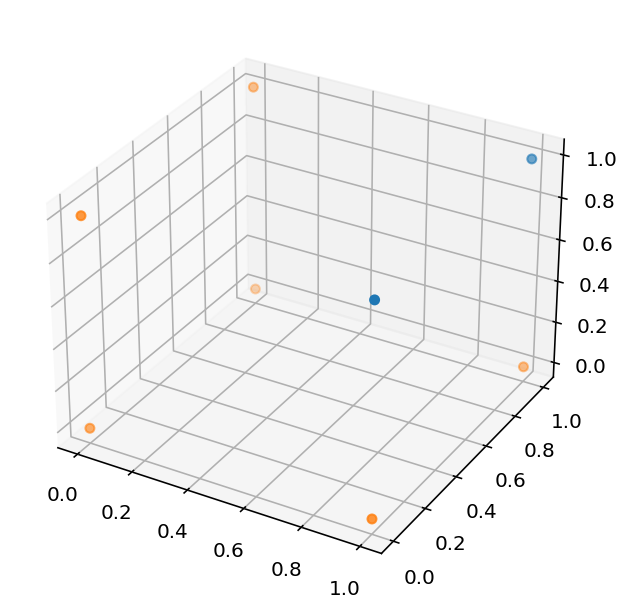

In [193]:
colors = ["tab:blue" if yn == 1 else "tab:orange" for yn in y]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*X.T, c=colors);

In [201]:
y = np.array([1, 1, 0, 0, 0, 0, 0, 0])

In [202]:
def heaviside(a): return 1 * (a >= 0)

w = np.zeros(4)
nits = 200
r = 1
for n in range(nits):
    for ϕi, yi in zip(Phi, y):
        yi_hat = heaviside(ϕi @ w)
        w = w  + r * (yi - yi_hat) * ϕi

In [203]:
y

array([1, 1, 0, 0, 0, 0, 0, 0])

In [204]:
heaviside(Phi @ w)

array([1, 1, 0, 0, 0, 0, 0, 0])

In [205]:
w

array([-3.,  1.,  0.,  2.])